<a href="https://colab.research.google.com/github/juancmq/stats2023/blob/main/Monsalve_Stats_22_Lab_9_Linear_Model_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

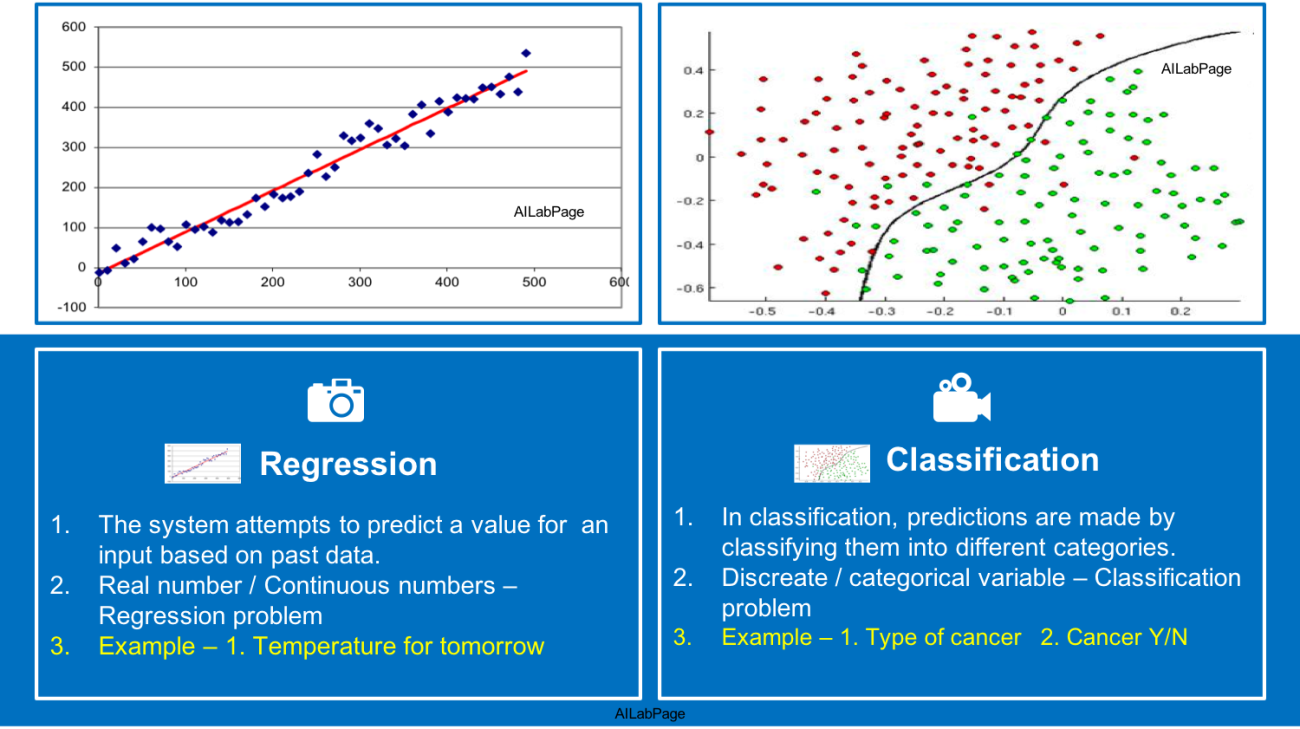

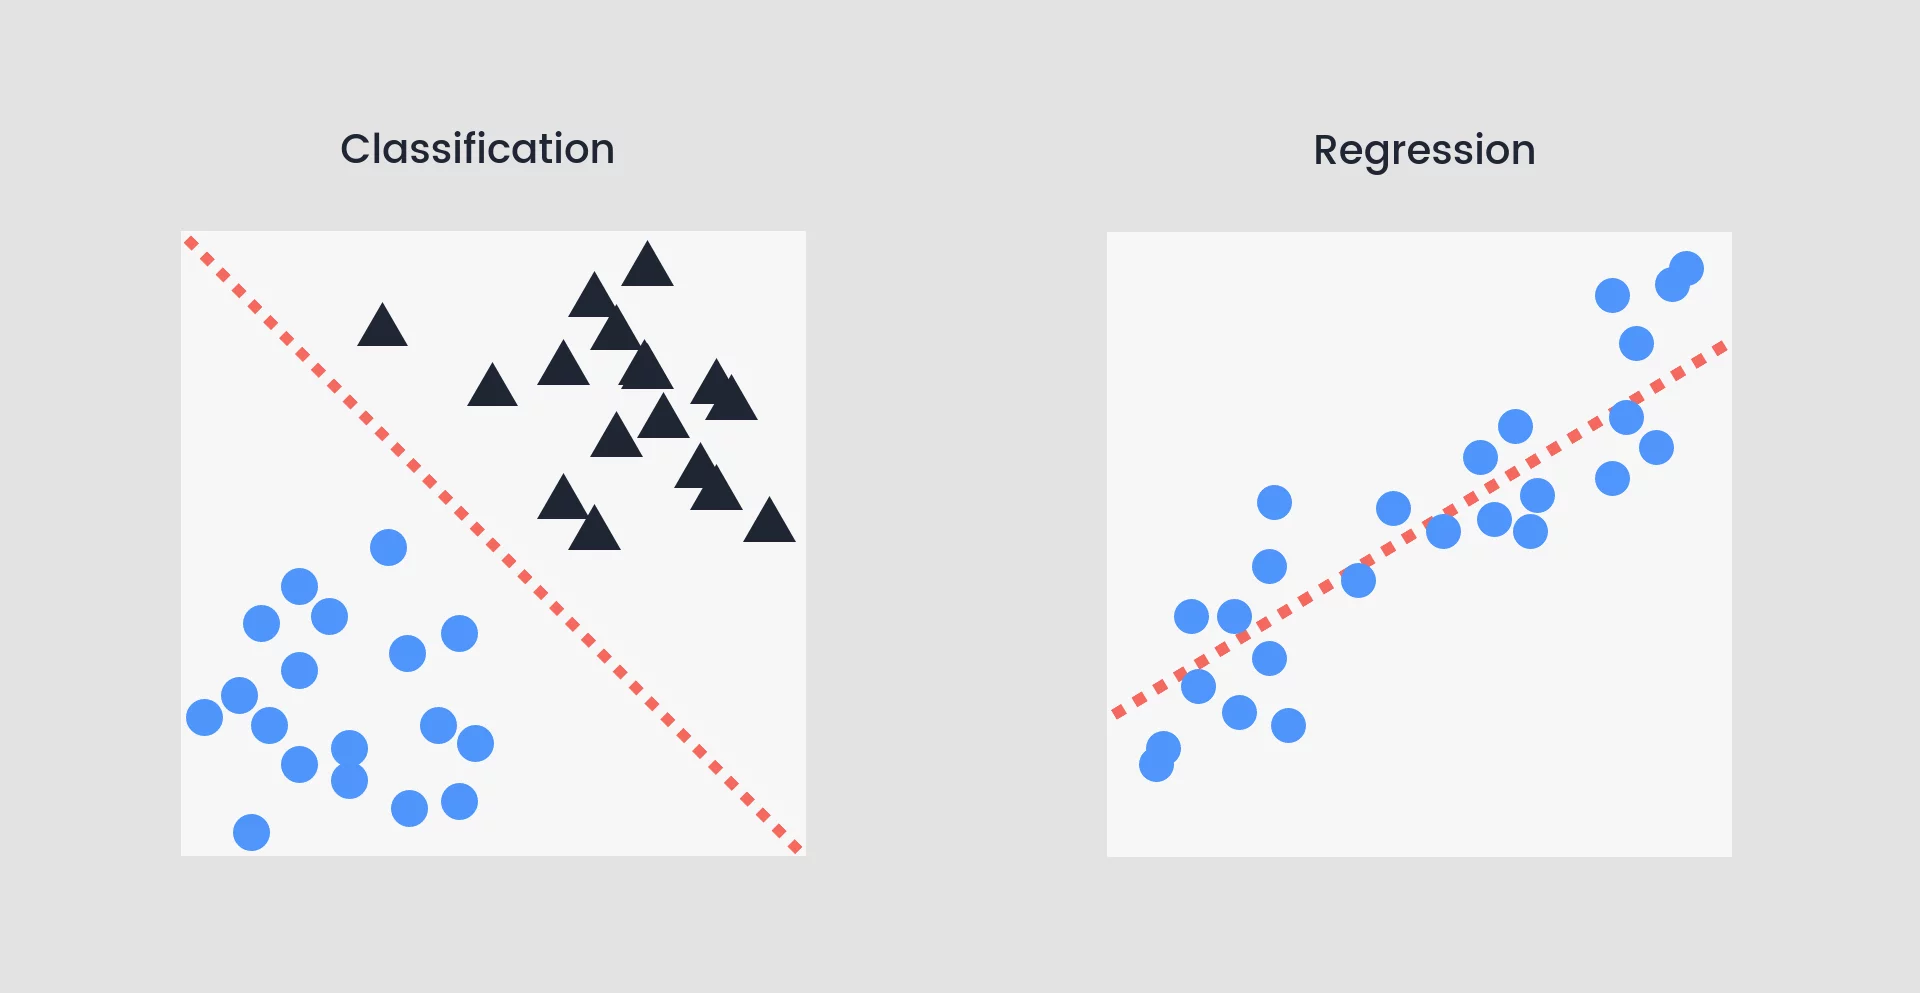

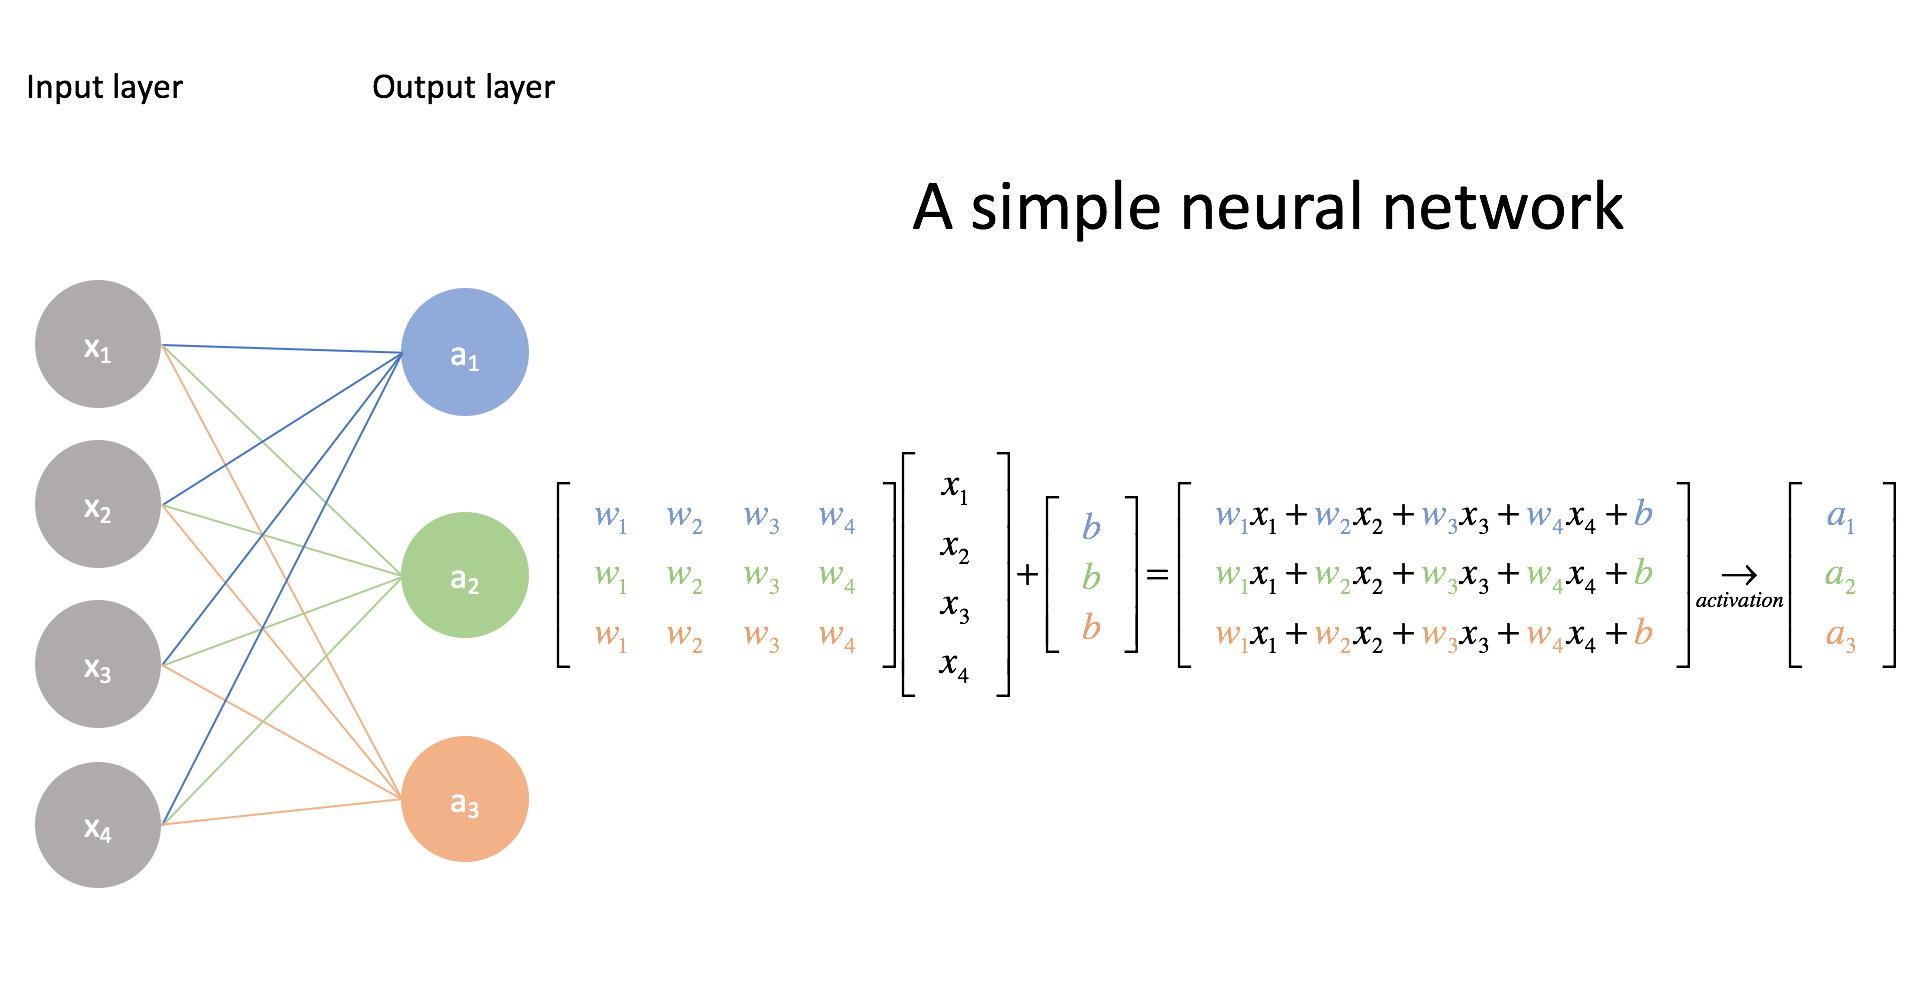

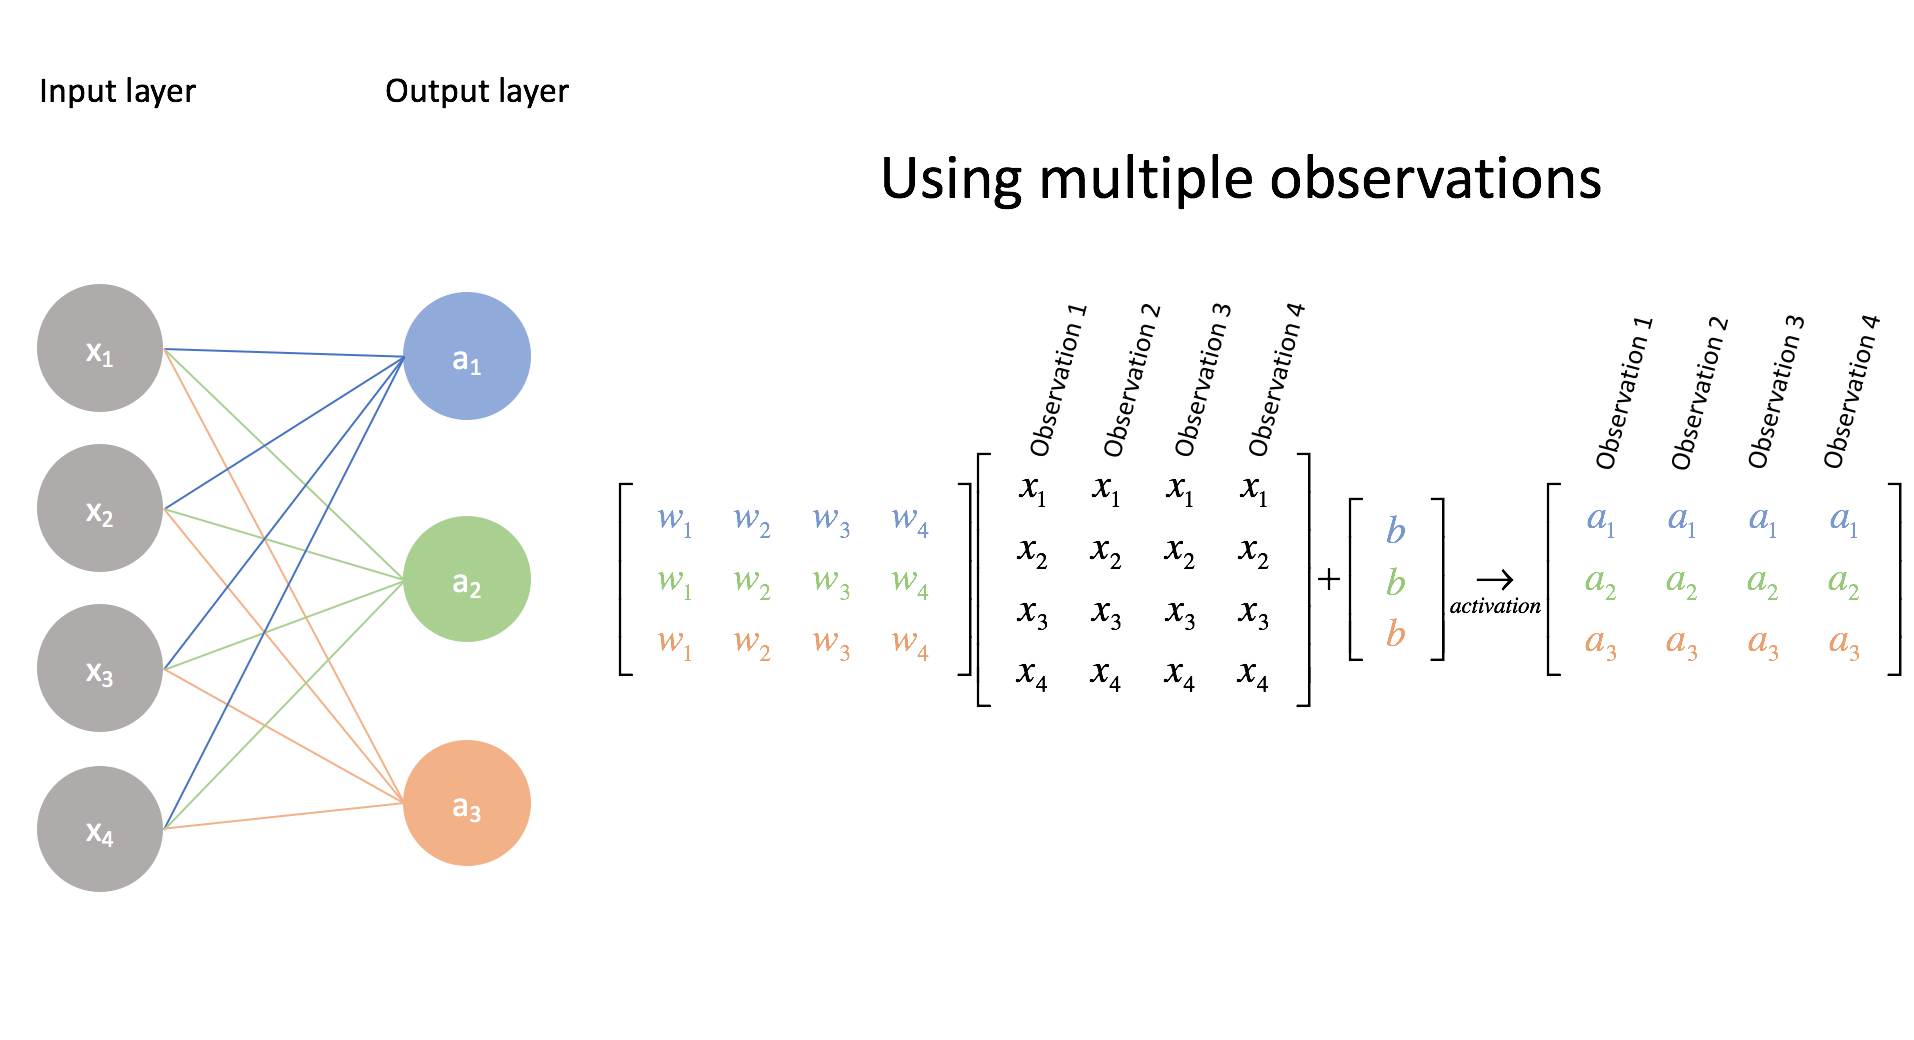

In [ ]:
!pip install git+https://github.com/williamedwardhahn/mpcr
from mpcr import *
import numpy as np
import matplotlib.pyplot as plt
!pip install wget
import wget
import torch
import torch.nn as nn
from torch import tensor 
from torch.autograd import Variable
from torch import randn # all of these are important to run the whole thing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-vko1mx1h
  Running command git clone -q https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-vko1mx1h
  Created wheel for ImportMPCR: filename=ImportMPCR-0.0.1-py3-none-any.whl size=7682 sha256=385c41ad4f765388c24ecd5ac3baa33b9006f91dee4468ee49a0c99832b743d5
  Stored in directory: /tmp/pip-ephem-wheel-cache-0vg1n2ob/wheels/8e/ce/5f/35330a2ccb2f50a7b7061e8a8b87f1ebe8d617d383beddc76f
Successfully built ImportMPCR


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=3849780a61966a42a09196ca64f12c02d66bc48f1b4613a1090da040cbfdff9d
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


# $y=mx+b$

In [ ]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [ ]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [ ]:
def one_hot(y):
    y2 = GPU_data(torch.zeros((y.shape[0],10)))
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1
    return y2

In [ ]:
##MNIST
train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
# train_set = datasets.KMNIST('./data', train=True, download=True)
# test_set = datasets.KMNIST('./data', train=False, download=True)

# Fashion MNIST
# train_set = datasets.FashionMNIST('./data', train=True, download=True)
# test_set = datasets.FashionMNIST('./data', train=False, download=True) # this is how we train the system to recognize different things

In [ ]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [ ]:
X.shape

(60000, 1, 28, 28)

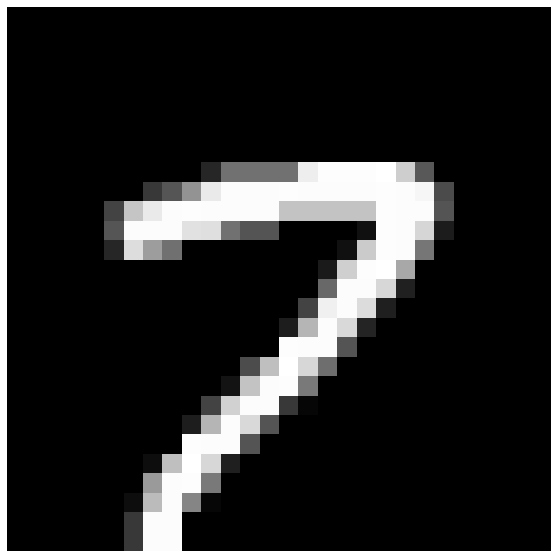

In [ ]:
plot(X[123,0,0:28,0:28]) # this is how we are able to only see a specific part of an image

In [ ]:
Y[123]

7

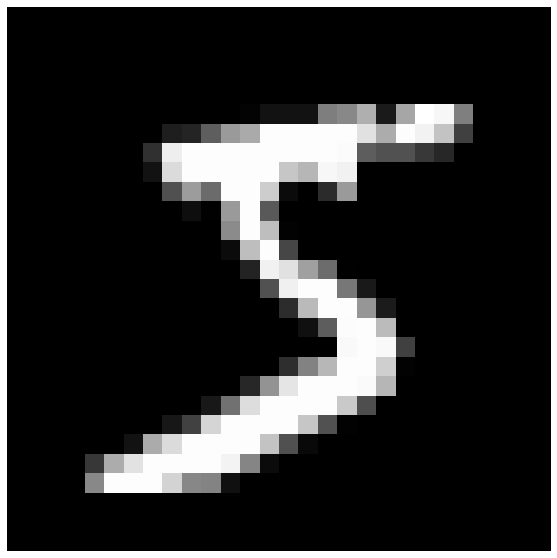

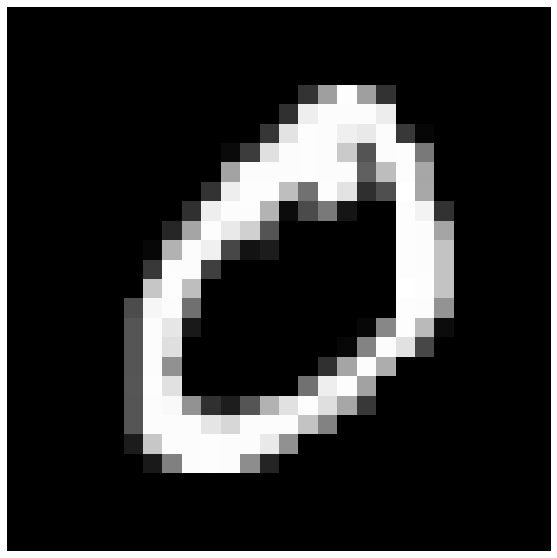

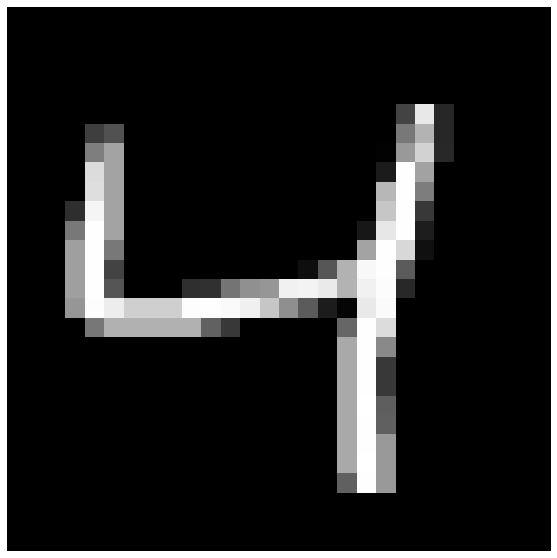

In [ ]:
for i in range(3):
    plot(X[i,0,:,:]) # in here we have randomly generated 3 parts of the bigger image

In [ ]:
Y

array([5, 0, 4, ..., 5, 6, 8])

In [ ]:
X[0:25,0,:,:].shape

(25, 28, 28)

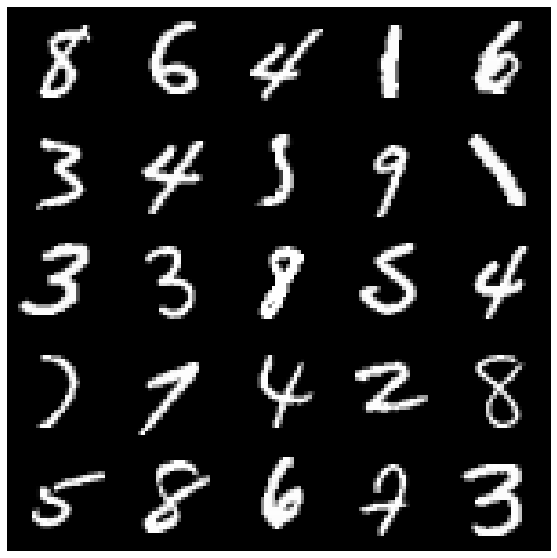

In [ ]:
montage_plot(X[125:150,0,:,:]) # this is the image from which we are getting the parts from

In [ ]:
X.shape[0]

60000

In [ ]:
X_test.shape

(10000, 1, 28, 28)

In [ ]:
X.shape[0]

60000

In [ ]:
X_test.shape[0]

10000

In [ ]:
28*28

784

In [ ]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

In [ ]:
X.shape,X_test.shape

((60000, 784), (10000, 784))

In [ ]:
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

TypeError: ignored

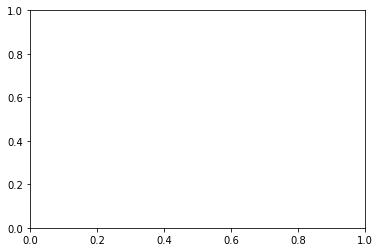

In [ ]:
plt.plot(X[100],'.') # this is how some of the data is spread

TypeError: ignored

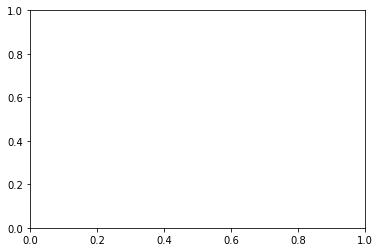

In [ ]:
plt.hist(X[0]) # different way to see the spread of the data

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

/usr/local/lib/python3.8/dist-packages/mpcr/__init__.py:144: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


In [ ]:
url = 'https://github.com/williamedwardhahn/ComplexSystems/raw/main/W.data'  
wget.download(url,"W.data")

'W.data'

In [ ]:
W = torch.load("W.data")

In [ ]:
W.shape

torch.Size([784, 10])

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 100)
    plt.show()

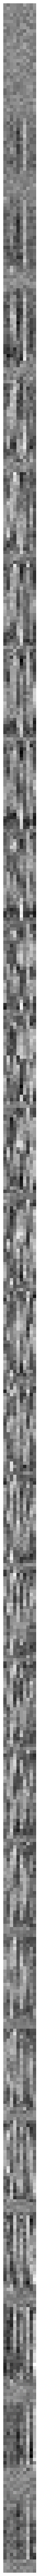

In [ ]:
plot(W[0:784,:10]) # this is how we display another part of the image

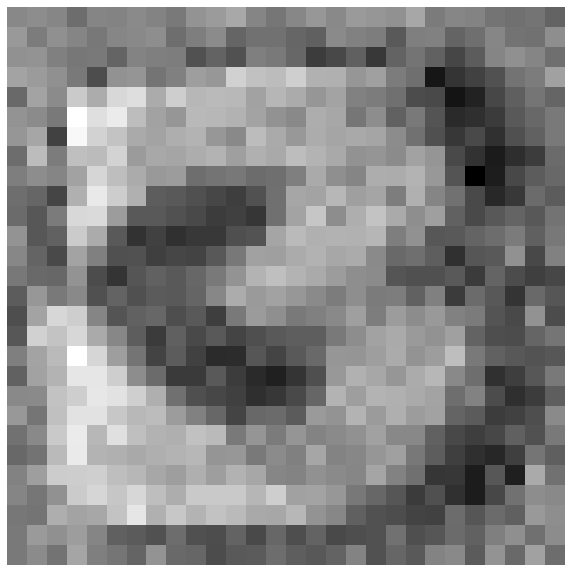

In [ ]:
plot(W[:,3].reshape(28,28))

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
b = 40

def get_batch(mode):
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y # this is how we further train it to identify numbers

In [ ]:
x,y = get_batch('train')

In [ ]:
x.shape

torch.Size([40, 784])

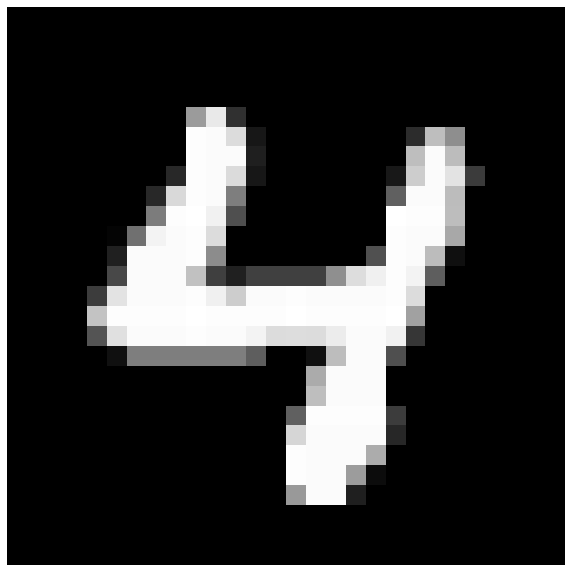

In [ ]:
plot(x[0].reshape(28,28))

In [ ]:
y

tensor([4., 9., 1., 0., 2., 1., 4., 2., 2., 3., 8., 4., 3., 5., 7., 6., 1., 7.,
        7., 8., 9., 0., 6., 1., 3., 2., 6., 3., 7., 4., 4., 5., 2., 6., 5., 7.,
        6., 8., 3., 0.], device='cuda:0')

In [ ]:
x.shape, W.shape

(torch.Size([40, 784]), torch.Size([784, 10]))

In [ ]:
torch.matmul(x,W).shape

torch.Size([40, 10])

In [ ]:
(x@W).shape

torch.Size([40, 10])

In [ ]:
y = x@W

In [ ]:
y.shape

torch.Size([40, 10])

In [ ]:
y

tensor([[ 3.5881e-01, -2.1659e+01, -8.5178e+00, -9.8376e+00,  1.6259e+01,
         -1.6162e+00,  2.7483e+00, -3.1927e+00,  3.0308e+00,  4.2623e+00],
        [-4.0005e+00, -8.0448e+00, -8.3780e+00, -6.5698e-01,  1.3341e+00,
         -1.2439e+00, -6.1650e+00,  7.3754e+00,  3.0992e+00,  1.1698e+01],
        [-4.8918e+00,  9.6220e+00,  4.5761e-01, -3.1545e-01, -6.3969e+00,
         -1.5858e+00,  1.6847e+00, -4.5972e+00,  4.0304e+00, -6.5021e-01],
        [ 1.4106e+01, -1.6184e+01, -4.7520e+00,  8.0684e-02, -7.2125e+00,
          4.9791e+00, -4.1823e+00, -1.7758e+00,  1.0806e+00, -1.7002e+00],
        [-8.2593e+00, -2.2338e-01,  1.2317e+01,  5.6954e-01, -1.6274e+01,
         -8.5574e+00,  1.1261e+00, -1.6779e+01, -3.8579e+00, -7.3556e+00],
        [-3.0486e+00,  8.8032e+00,  2.4052e+00, -3.2290e-01, -4.0165e+00,
         -5.1909e+00, -1.8694e-01, -3.3205e+00,  2.6795e+00, -2.2849e+00],
        [-2.8258e+00, -2.3574e+01, -2.4229e+00, -1.0972e+01,  9.0436e+00,
         -1.0254e+01,  1.2501e+0

In [ ]:
torch.argmax(y,1)

tensor([4, 9, 1, 0, 2, 1, 4, 2, 2, 3, 8, 4, 3, 5, 4, 6, 1, 7, 7, 1, 9, 0, 0, 1,
        3, 2, 6, 3, 7, 4, 4, 5, 2, 6, 0, 2, 2, 8, 3, 0], device='cuda:0')

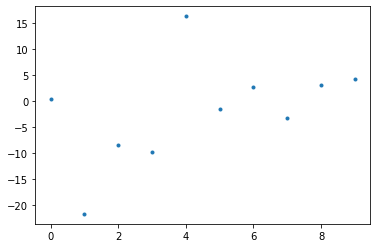

In [ ]:
plt.plot(y[0].cpu().detach().numpy().T,'.')

https://eleif.net/clicktimer.html

In [ ]:
x@W

tensor([[ 3.5881e-01, -2.1659e+01, -8.5178e+00, -9.8376e+00,  1.6259e+01,
         -1.6162e+00,  2.7483e+00, -3.1927e+00,  3.0308e+00,  4.2623e+00],
        [-4.0005e+00, -8.0448e+00, -8.3780e+00, -6.5698e-01,  1.3341e+00,
         -1.2439e+00, -6.1650e+00,  7.3754e+00,  3.0992e+00,  1.1698e+01],
        [-4.8918e+00,  9.6220e+00,  4.5761e-01, -3.1545e-01, -6.3969e+00,
         -1.5858e+00,  1.6847e+00, -4.5972e+00,  4.0304e+00, -6.5021e-01],
        [ 1.4106e+01, -1.6184e+01, -4.7520e+00,  8.0684e-02, -7.2125e+00,
          4.9791e+00, -4.1823e+00, -1.7758e+00,  1.0806e+00, -1.7002e+00],
        [-8.2593e+00, -2.2338e-01,  1.2317e+01,  5.6954e-01, -1.6274e+01,
         -8.5574e+00,  1.1261e+00, -1.6779e+01, -3.8579e+00, -7.3556e+00],
        [-3.0486e+00,  8.8032e+00,  2.4052e+00, -3.2290e-01, -4.0165e+00,
         -5.1909e+00, -1.8694e-01, -3.3205e+00,  2.6795e+00, -2.2849e+00],
        [-2.8258e+00, -2.3574e+01, -2.4229e+00, -1.0972e+01,  9.0436e+00,
         -1.0254e+01,  1.2501e+0

In [ ]:
y2 = x@W 

In [ ]:
y2.shape

torch.Size([40, 10])

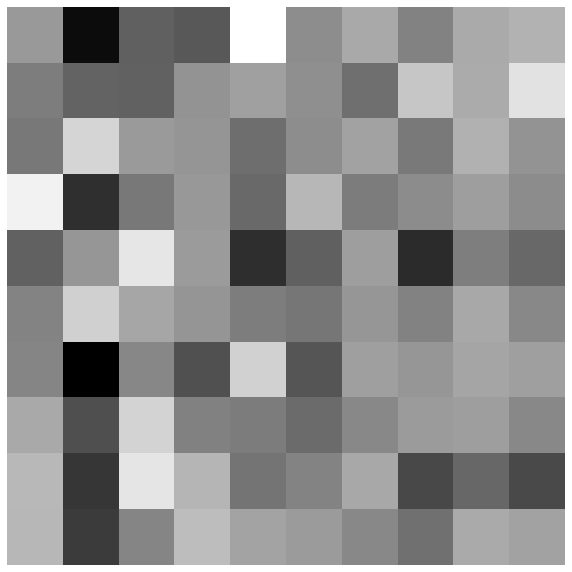

In [ ]:
plot(y2[0:10,:])

In [ ]:
y

tensor([[ 3.5881e-01, -2.1659e+01, -8.5178e+00, -9.8376e+00,  1.6259e+01,
         -1.6162e+00,  2.7483e+00, -3.1927e+00,  3.0308e+00,  4.2623e+00],
        [-4.0005e+00, -8.0448e+00, -8.3780e+00, -6.5698e-01,  1.3341e+00,
         -1.2439e+00, -6.1650e+00,  7.3754e+00,  3.0992e+00,  1.1698e+01],
        [-4.8918e+00,  9.6220e+00,  4.5761e-01, -3.1545e-01, -6.3969e+00,
         -1.5858e+00,  1.6847e+00, -4.5972e+00,  4.0304e+00, -6.5021e-01],
        [ 1.4106e+01, -1.6184e+01, -4.7520e+00,  8.0684e-02, -7.2125e+00,
          4.9791e+00, -4.1823e+00, -1.7758e+00,  1.0806e+00, -1.7002e+00],
        [-8.2593e+00, -2.2338e-01,  1.2317e+01,  5.6954e-01, -1.6274e+01,
         -8.5574e+00,  1.1261e+00, -1.6779e+01, -3.8579e+00, -7.3556e+00],
        [-3.0486e+00,  8.8032e+00,  2.4052e+00, -3.2290e-01, -4.0165e+00,
         -5.1909e+00, -1.8694e-01, -3.3205e+00,  2.6795e+00, -2.2849e+00],
        [-2.8258e+00, -2.3574e+01, -2.4229e+00, -1.0972e+01,  9.0436e+00,
         -1.0254e+01,  1.2501e+0

In [ ]:
one_hot(y)

ValueError: ignored

In [ ]:
plot(one_hot(y))

ValueError: ignored

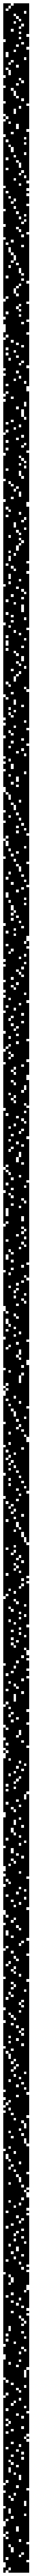

In [ ]:
plot(one_hot(torch.argmax(y2,1)))

In [ ]:
y

tensor([[ 3.5881e-01, -2.1659e+01, -8.5178e+00, -9.8376e+00,  1.6259e+01,
         -1.6162e+00,  2.7483e+00, -3.1927e+00,  3.0308e+00,  4.2623e+00],
        [-4.0005e+00, -8.0448e+00, -8.3780e+00, -6.5698e-01,  1.3341e+00,
         -1.2439e+00, -6.1650e+00,  7.3754e+00,  3.0992e+00,  1.1698e+01],
        [-4.8918e+00,  9.6220e+00,  4.5761e-01, -3.1545e-01, -6.3969e+00,
         -1.5858e+00,  1.6847e+00, -4.5972e+00,  4.0304e+00, -6.5021e-01],
        [ 1.4106e+01, -1.6184e+01, -4.7520e+00,  8.0684e-02, -7.2125e+00,
          4.9791e+00, -4.1823e+00, -1.7758e+00,  1.0806e+00, -1.7002e+00],
        [-8.2593e+00, -2.2338e-01,  1.2317e+01,  5.6954e-01, -1.6274e+01,
         -8.5574e+00,  1.1261e+00, -1.6779e+01, -3.8579e+00, -7.3556e+00],
        [-3.0486e+00,  8.8032e+00,  2.4052e+00, -3.2290e-01, -4.0165e+00,
         -5.1909e+00, -1.8694e-01, -3.3205e+00,  2.6795e+00, -2.2849e+00],
        [-2.8258e+00, -2.3574e+01, -2.4229e+00, -1.0972e+01,  9.0436e+00,
         -1.0254e+01,  1.2501e+0

In [ ]:
torch.argmax(y2,1)

tensor([4, 9, 1, 0, 2, 1, 4, 2, 2, 3, 8, 4, 3, 5, 4, 6, 1, 7, 7, 1, 9, 0, 0, 1,
        3, 2, 6, 3, 7, 4, 4, 5, 2, 6, 0, 2, 2, 8, 3, 0], device='cuda:0')

In [ ]:
b

40

In [ ]:
torch.sum(y == torch.argmax(y2,1))/b

RuntimeError: ignored

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
%%timeit
X[20000]@W

26.7 µs ± 817 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
torch.argmax(X@W,1)

tensor([5, 0, 4,  ..., 5, 6, 8], device='cuda:0')

In [ ]:
Y

tensor([5., 0., 4.,  ..., 5., 6., 8.], device='cuda:0')

In [ ]:
torch.sum(torch.argmax(X@W,1) == Y)/60000

tensor(0.9122, device='cuda:0')

In [ ]:
X@W

tensor([[  1.1735,  -5.3252,  -2.2280,  ...,   2.8160,  -2.5256,  -4.7146],
        [ 14.1848, -13.8266,  -2.0614,  ...,  -2.7536,  -0.4526,  -5.3169],
        [ -3.9527,  -9.5646,  -3.1270,  ...,  -0.5796,  -2.7272,   0.5264],
        ...,
        [  1.7139,  -3.4259, -10.8608,  ...,  -0.3874,   5.0143,   0.4739],
        [  3.0898, -10.5911,  -2.0102,  ...,  -4.0874,  -7.1931,  -2.6339],
        [  2.8741,  -6.6511,  -1.8780,  ...,  -3.2709,   7.5771,   1.3491]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
W.shape

torch.Size([784, 10])

In [ ]:
W[:,0].shape

torch.Size([784])

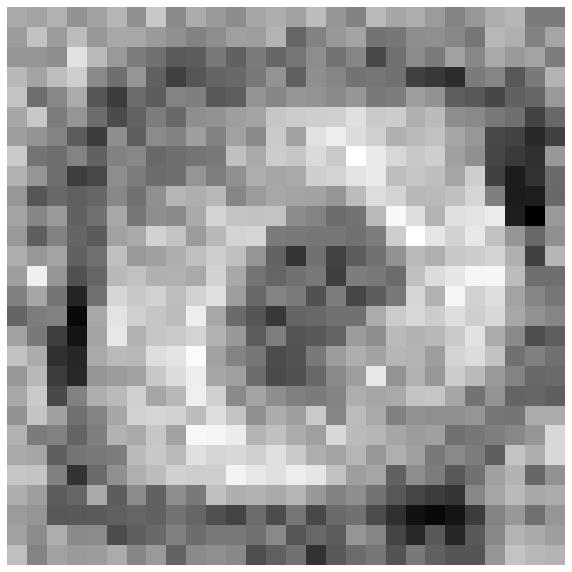

In [ ]:
plot(W[:,0].reshape(28,28))

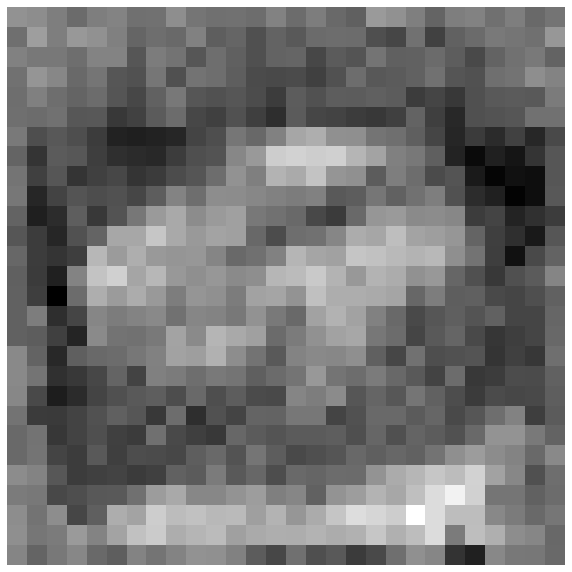

In [ ]:
plot(W[:,9].reshape(28,28))

In [ ]:
W.shape

torch.Size([784, 10])

In [ ]:
(W.T).shape

torch.Size([10, 784])

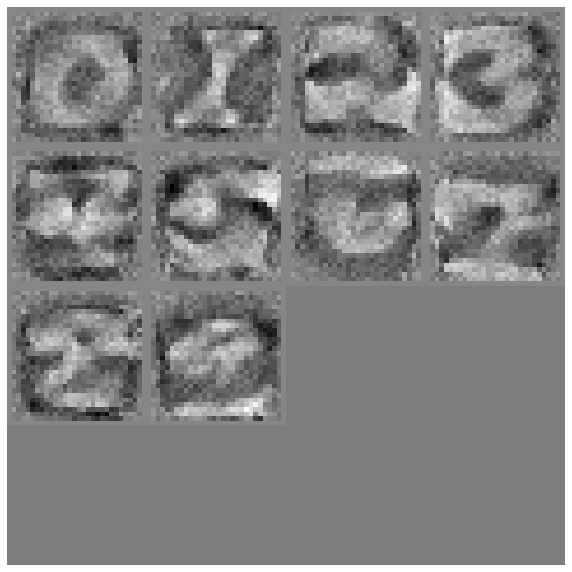

In [ ]:
montage_plot((W.T).reshape(10,28,28).cpu().detach().numpy())

In [ ]:
###################################################

In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w):

    return x@w[0]

In [ ]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    xt,yt = get_batch('test')

    acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train, "acc_test": acc_test})

In [ ]:
wb.init(project="Simple_Linear_Adam_KMNIST");
c = wb.config

c.h = 0.01
c.b = 1024
c.epochs = 1000

w = [GPU(Truncated_Normal((784,10)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()

    # if i % 1000 == 0 : montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


/usr/local/lib/python3.8/dist-packages/mpcr/__init__.py:141: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


#Generator

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [ ]:
batch_size = 512

In [ ]:
# #MNIST
# train_set = datasets.MNIST('./data', train=True, download=True)
# test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
# train_set = datasets.KMNIST('./data', train=True, download=True)
# test_set = datasets.KMNIST('./data', train=False, download=True)

#Fashion MNIST
train_set = datasets.FashionMNIST('./data', train=True, download=True)
test_set = datasets.FashionMNIST('./data', train=False, download=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()
X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255
X = (X - 0.5)/0.5
X_test = (X_test - 0.5)/0.5

In [ ]:
n = 7

index = np.where(Y == n)
X = X[index]
index = np.where(Y_test == n)
X_test = X_test[index]

In [ ]:
X.shape,Y.shape,X_test.shape,Y_test.shape

((6000, 1, 28, 28), (60000,), (1000, 1, 28, 28), (10000,))

In [ ]:
###################################################

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
X = GPU_data(X)
X_test = GPU_data(X_test)

Y = GPU_data(Y)
Y_test = GPU_data(Y_test)

In [ ]:
X = (X + 1)/2
X_test = (X_test + 1)/2

In [ ]:
def get_batch(mode):
    b = batch_size
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:,:,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:,:,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
x,y = get_batch('train')

(array([288013.,  12886.,  10384.,   9640.,  10004.,  10617.,  13813.,
         18182.,  18348.,   9521.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

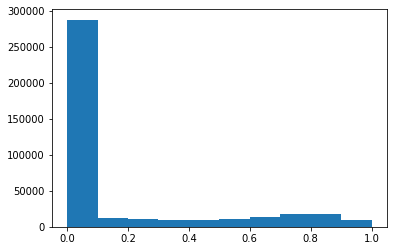

In [ ]:
plt.hist(x.flatten().cpu().numpy())

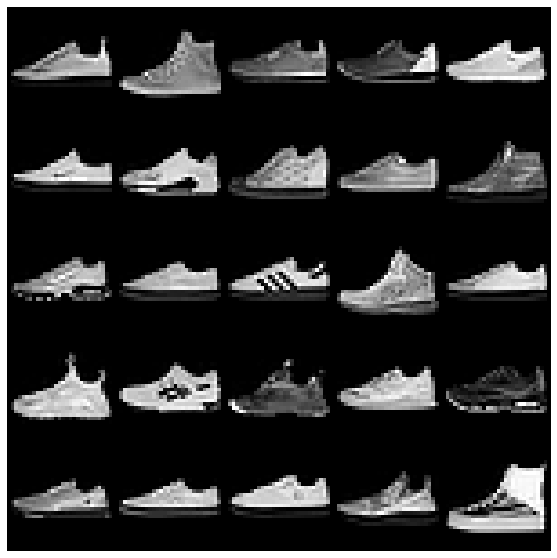

In [ ]:
montage_plot(x[0:25,0,:,:].detach().cpu().numpy())

In [ ]:
X = X.view(-1,784)
X_test = X_test.view(-1,784)

def get_batch(mode):
    b = batch_size
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
def MSE(image_batch_recon, image_batch):
    return torch.mean((image_batch_recon - image_batch)**2)

In [ ]:
def Encoder(x,w):
    return x@w[0]

In [ ]:
def Decoder(x,w):
    return x@(w[0].T)

In [ ]:
def Autoencoder(x,w):
    return Decoder(Encoder(x,w),w)

In [ ]:
batch_size = 512
steps = 10000
learning_rate = 4e-3

In [ ]:
w0 = GPU(randn_trunc((784,78)))
w = [w0]

optimizer = torch.optim.Adam(params=w, lr=learning_rate, weight_decay=1e-5)

for step in range(steps):
        
    x,y = get_batch('train')
    
    # autoencoder reconstruction
    x2 = Autoencoder(x,w)
    
    # reconstruction error
    loss = MSE(x2, x)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 

    if step % 1000 == 0:
        print(loss.item())

0.4472200870513916
0.004679923411458731
0.0035298678558319807
0.0033330514561384916
0.0033869862090796232
0.003108908189460635
0.003319574287161231
0.003222004510462284
0.003439662279561162
0.0030639779288321733


In [ ]:
# batch_size = 16

In [ ]:
x,y = get_batch('test')

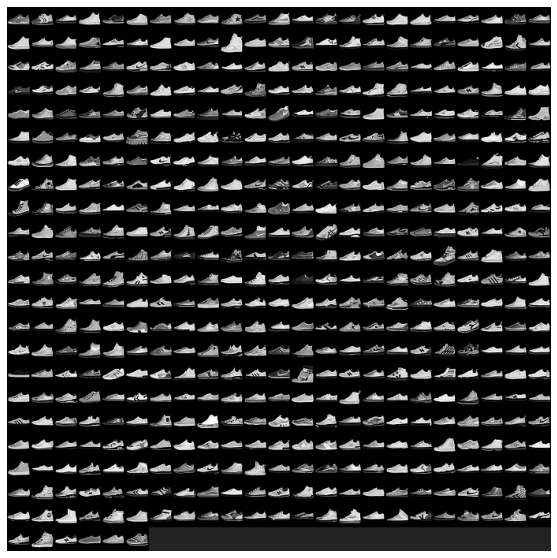

In [ ]:
montage_plot(x.reshape(-1,28,28).detach().cpu().numpy())

In [ ]:
x.shape

torch.Size([512, 784])

In [ ]:
Decoder(Encoder(x,w),w).shape

torch.Size([512, 784])

In [ ]:
x2 = Autoencoder(x,w)

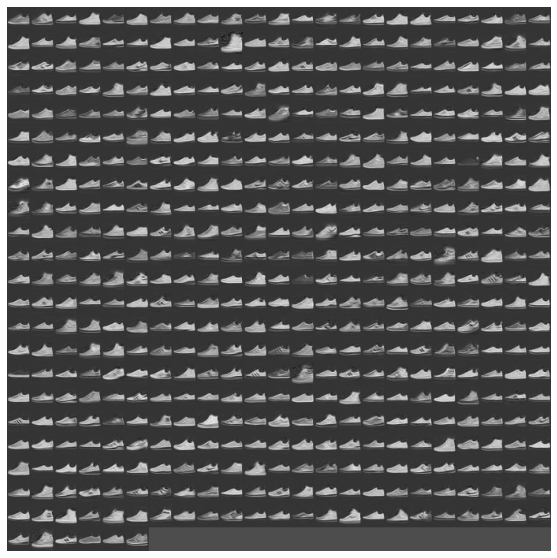

In [ ]:
montage_plot(x2.reshape(-1,28,28).detach().cpu().numpy())

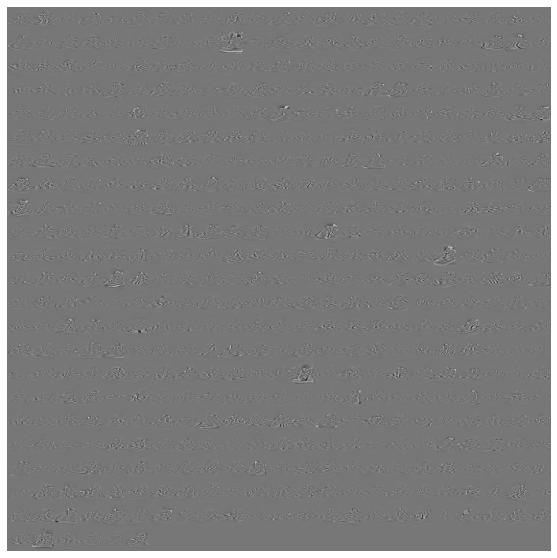

In [ ]:
montage_plot((x-x2).reshape(-1,28,28).detach().cpu().numpy())

In [ ]:
w[0].shape

torch.Size([784, 78])

In [ ]:
wp = w[0].T 

In [ ]:
wp = wp.reshape(-1,28,28)

In [ ]:
wp.shape

torch.Size([78, 28, 28])

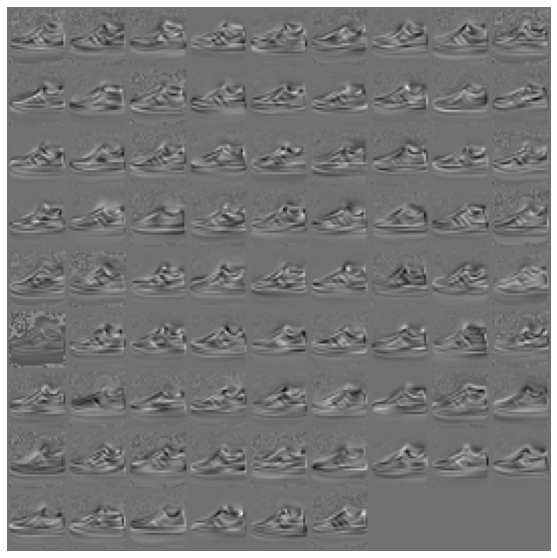

In [ ]:
montage_plot(wp.detach().cpu().numpy())

In [ ]:
x.shape

torch.Size([512, 784])

In [ ]:
x = x[0:1]

In [ ]:
y = Encoder(x,w)

In [ ]:
y.shape

torch.Size([1, 78])

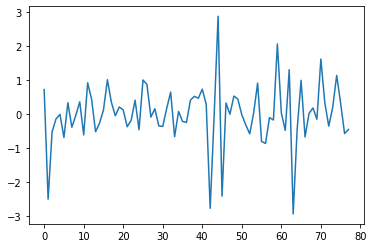

In [ ]:
plt.plot(y[0].cpu().detach().numpy())

In [ ]:
noise = 0.5*np.random.randn(78)

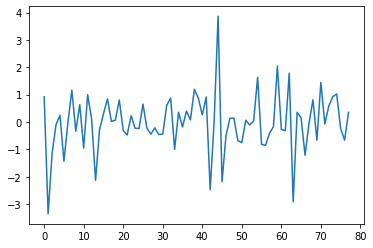

In [ ]:
plt.plot(y[0].cpu().detach().numpy() + noise)

In [ ]:
noise

array([ 0.19507184, -0.85827406, -0.63666038,  0.03565415,  0.24950113,
       -0.7490462 , -0.37761004,  1.54727676, -0.30299161,  0.26589402,
       -0.34455299,  0.06870223, -0.32579392, -1.61932763, -0.01732656,
        0.16849988, -0.17254091, -0.33318163,  0.10633869,  0.59123745,
       -0.44295715, -0.10668728,  0.4097209 , -0.64470992,  0.21550855,
       -0.35813643, -1.11512522, -0.35804491, -0.37635028, -0.11945978,
       -0.07986132,  0.43011869,  0.22124801, -0.33692047,  0.27143229,
        0.02522566,  0.63990982, -0.3387885 ,  0.66202712,  0.39996437,
       -0.48162702,  0.62438077,  0.29798119,  0.0668372 ,  0.97425238,
        0.22672742, -0.82475952,  0.13731798, -0.39688022, -1.13017803,
       -0.73776984,  0.37422159,  0.46854833, -0.00265431,  0.71246005,
       -0.01433123,  0.00639642, -0.31771268, -0.00247858, -0.0301542 ,
       -0.31571286,  0.15558504,  0.4732282 ,  0.01583296,  0.79862113,
       -0.84960809, -0.54731761, -0.07432062,  0.62357073, -0.51

In [ ]:
noise = GPU(noise)

In [ ]:
x2 = Decoder(y+noise,w)

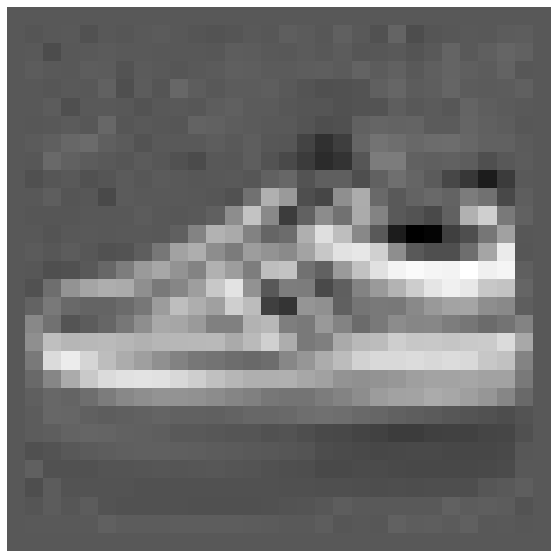

In [ ]:
montage_plot(x2.reshape(-1,28,28).detach().cpu().numpy())

In [ ]:
x2 = Decoder(y,w)

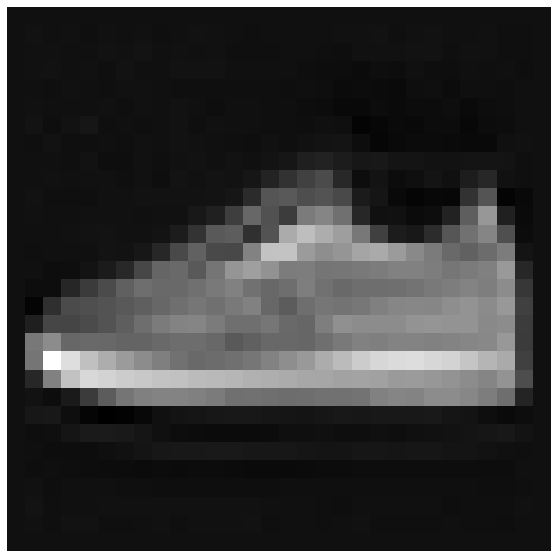

In [ ]:
montage_plot(x2.reshape(-1,28,28).detach().cpu().numpy())